In [33]:
import numpy as np
import cv2
from imutils.object_detection import non_max_suppression
from imutils import paths
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# initialize the HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

[INFO] person_306.png: 2 original boxes, 2 after suppression
[INFO] person_and_bike_177.png: 1 original boxes, 1 after suppression
[INFO] crop001520.png: 3 original boxes, 3 after suppression
[INFO] person_236.png: 7 original boxes, 4 after suppression
[INFO] crop001684.png: 1 original boxes, 1 after suppression
[INFO] person_272.png: 3 original boxes, 3 after suppression
[INFO] person_and_bike_086.png: 1 original boxes, 1 after suppression
[INFO] crop001002.png: 3 original boxes, 3 after suppression
[INFO] crop001501.png: 0 original boxes, 0 after suppression
[INFO] person_and_bike_188.png: 1 original boxes, 1 after suppression
[INFO] crop001573.png: 4 original boxes, 3 after suppression
[INFO] person_034.png: 1 original boxes, 1 after suppression


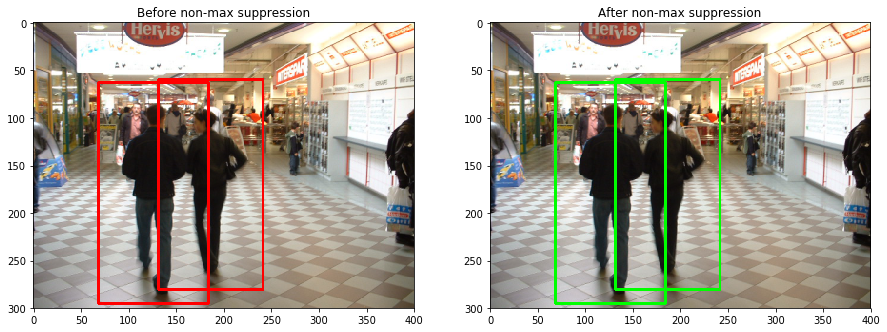

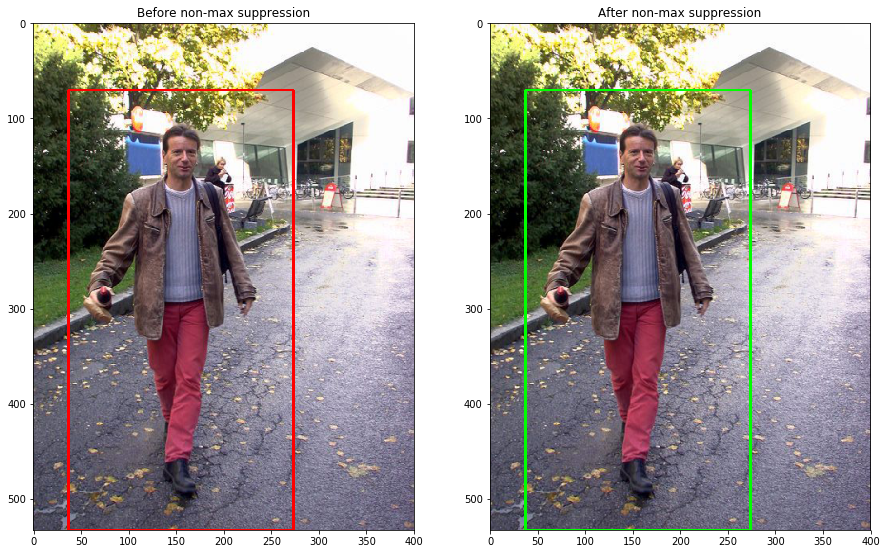

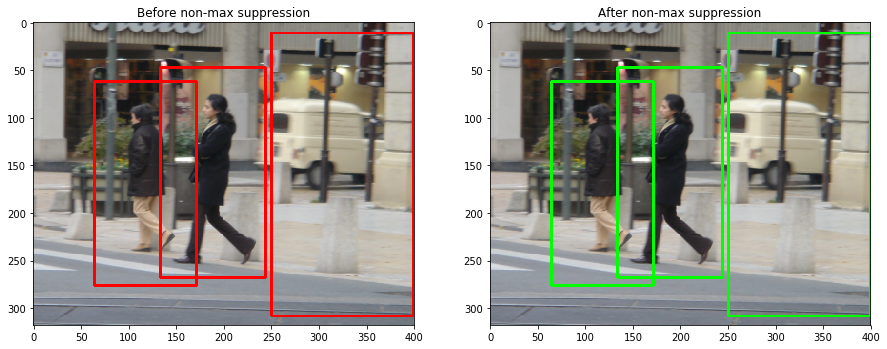

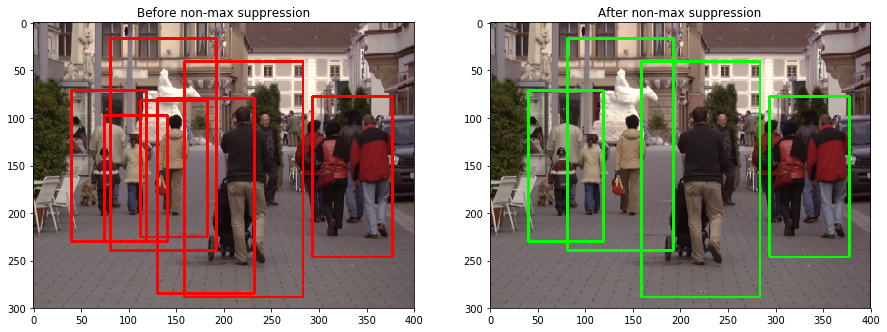

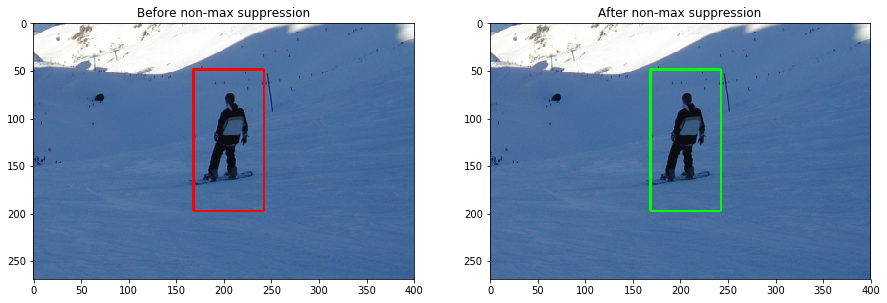

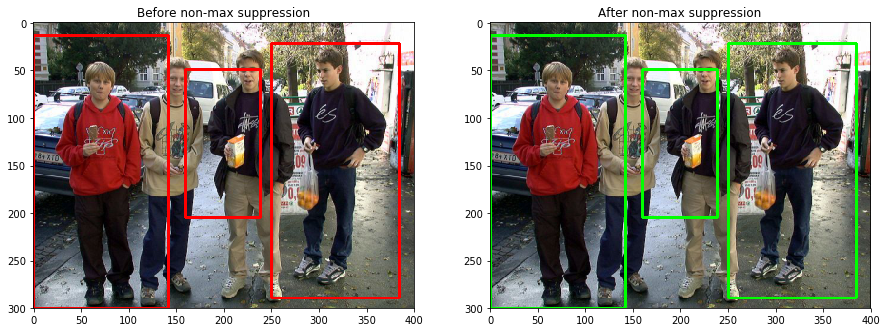

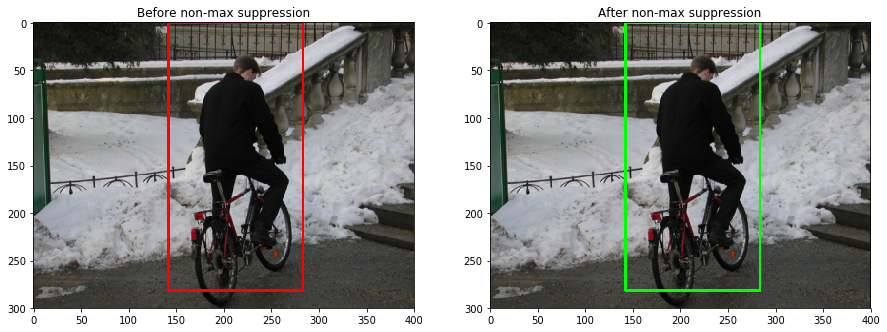

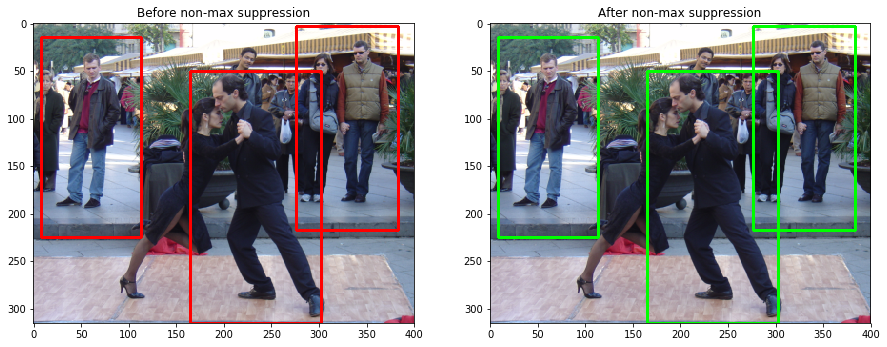

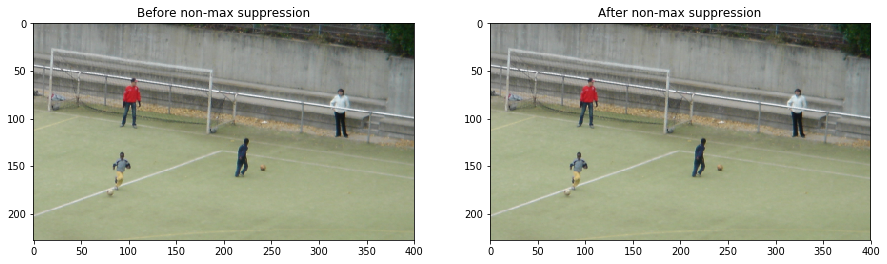

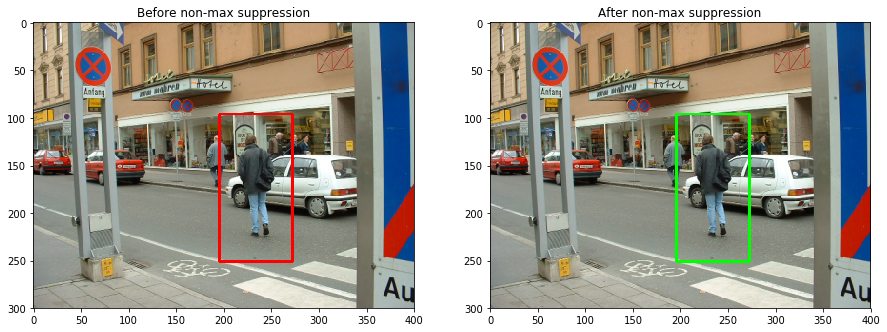

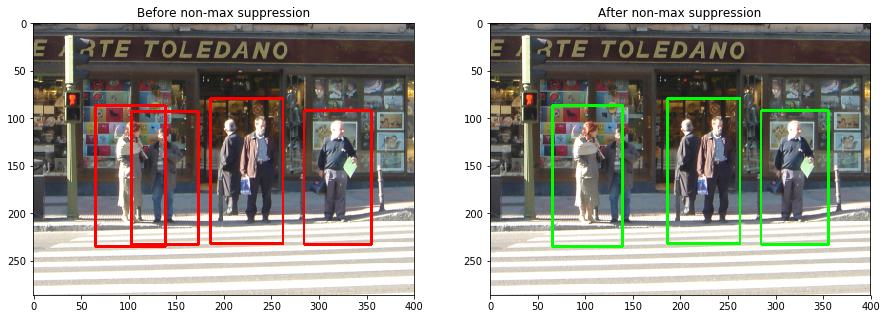

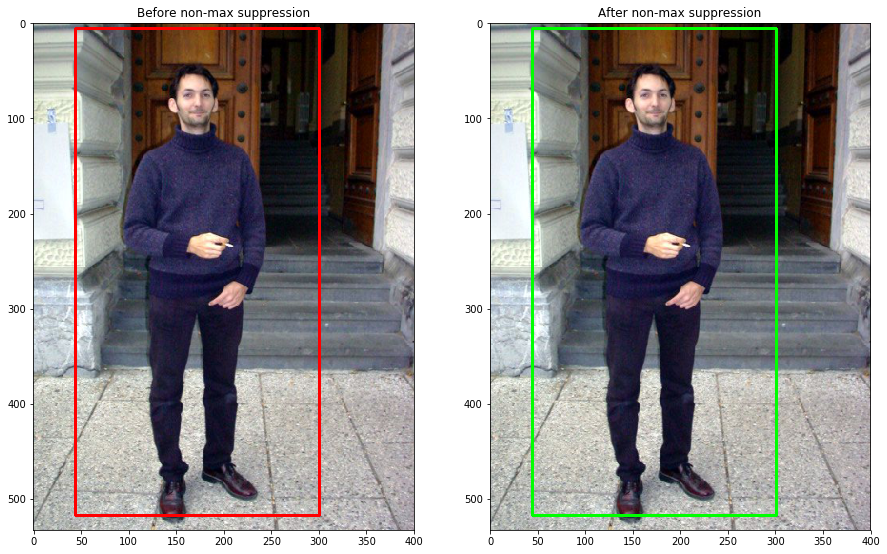

In [70]:
# loop over the image paths
for imagePath in paths.list_images('data/'):

    image = cv2.imread(imagePath)
    # to reduce detection time and improve detection accuracy, resize images 
    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()

    # detect people in the image
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(6, 6), scale=1.05)

    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-max suppression to the bounding boxes using a fairly large 
    # overlap threshold to try to maintain overlapping boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.5)
    
    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
        
    # show some information on the number of bounding boxes
    filename = imagePath[imagePath.rfind("/") + 1:]
    print("[INFO] {}: {} original boxes, {} after suppression".format(
        filename, len(rects), len(pick)))
    
    plotting(orig, image)

In [66]:
def plotting(img1, img2):
    fig = plt.figure(figsize=(2, 2))
    fig.set_size_inches(15, 10)
    
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    a = fig.add_subplot(1,2,1)
    plt.imshow(img1)
    a.set_title('Before non-max suppression')
    
    a = fig.add_subplot(1,2,2)
    plt.imshow(img2)
    a.set_title('After non-max suppression')